In [4]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%load_ext autoreload
%autoreload 2


# Import modules created for this project
import project_modules.calibrate_camera as cc
import project_modules.image_process as ip
import project_modules.find_lanes as fl

In [5]:
# Misc functions

def display_lane(img, left_fit, right_fit,left_lane_inds,right_lane_inds):
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )   
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    plt.figure(figsize=(8, 5))
    plt.imshow(img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.show()
    
def display_lane2(img, left_fit, right_fit, left_lane_inds, right_lane_inds):
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    
    out_img = np.dstack((img, img, img))*255

    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((img, img, img))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    plt.figure(figsize=(8, 5))
    plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.show()
    

In [6]:
# Image procss pipeline
def image_process_pipeline(img, imgpoints, objpoints):
    img = ip.undistort_image(img, imgpoints, objpoints)
    img = ip.color_gradient_threshold(img)
    img, Minv = ip. perspective_transform(img)    
    return img, Minv

In [7]:
image_names = cc.get_calibration_image_names()
imgpoints, objpoints = cc.calibrate_camera(image_names)

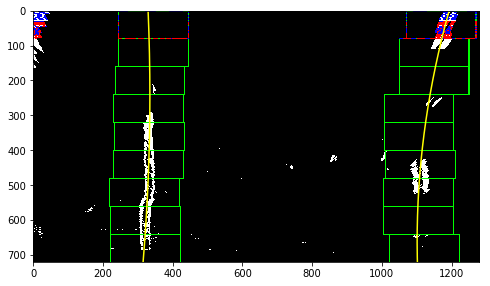

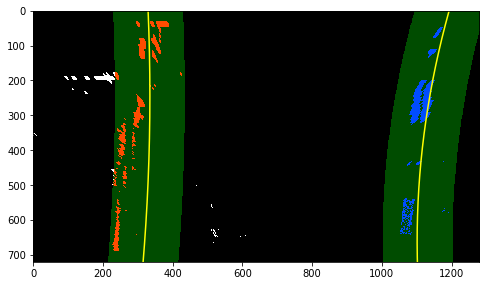

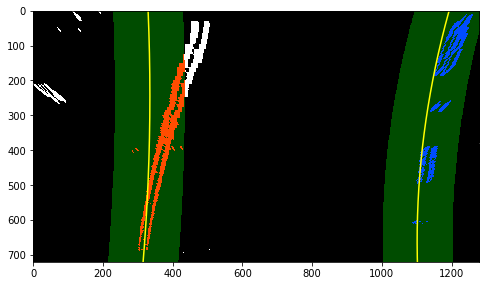

In [8]:
images = ['./test_images/test4.jpg', './test_images/test5.jpg', './test_images/test6.jpg']
img = cv2.imread(images[0])
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit, right_fit, left_lane_inds, right_lane_inds = fl.find_lanes(processed_img)
display_lane(out_img, left_fit, right_fit, left_lane_inds, right_lane_inds)

img = cv2.imread(images[1])
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit2, right_fit2, left_lane_inds, right_lane_inds = fl.find_lanes_next(processed_img, left_fit, right_fit)
display_lane2(processed_img, left_fit, right_fit, left_lane_inds, right_lane_inds)


img = cv2.imread(images[2])
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit2, right_fit2, left_lane_inds, right_lane_inds = fl.find_lanes_next(processed_img, left_fit, right_fit)
display_lane2(processed_img, left_fit, right_fit, left_lane_inds, right_lane_inds)